## 1.Motivation

### What is your dataset?

The main dataset used to build the app is a mix of several datasets grouped by Neighborhood and Year from the period between 2015 and 2019. It includes several features such as Average Rental price/m2, Average Airbnb flats, Average Airbnb price per night or Average weight of Airbnb in every neighborhood.

The data that feeds this final datasets comes from the Barcelona's townhall and from InsideAirbnb.com mainly.

### Why did you choose this/these particular dataset(s)?

We used this datasets because one of the main current problems in Barcelona, apart from coronavirus, is the housing market for the locals, specially renting. And one of the main explanations for this problems is blaiming the growth of Airbnb in the city. Therefore we considered that studying the evolutions of prices per m2 and the growth of Airbnb listings was relevant to better understand this problem.

### What was your goal for the end user's experience?

The goal is to provide lots of insights regarding this topic in a small interactive dashboard. In this section, we aimed to make the user participant of the story. We present the problem, provide a tool to explore it and finally we share our insights. But the app is open for the specific curiosity of every user. 


## 2.Basic stats. Let's understand the dataset better

### Write about your choices in data cleaning and preprocessing.

   The two main sources that form the final dataset are periodic airbnb listings and periodic data regarding rental houses and their prices. The one of airbnb was formed by several monthly datasets of the listings in barcelona. Therefore it was needed to load them in the same dataset and group them by the average per year and per neighbourhood. The data from the townhall of Barcelona wasn't easy to get nor clean because the formatting was horrible to analyze data. Therefore, for this data, Excel and Python were used equally to clean it. Finally both were merged together.

Apart from this main dataset, it has been used a geojson dataset of the neighborhoods in Barcelona to plot in a map, and a dataset of the total living units per neighborhood to calculate the incidence of Airbnb inside every Neighborhood. 
   
### Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

The final dataset is:


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('https://raw.githubusercontent.com/datatouristbcn/datatouristbcn.github.io/master/final_dataset_app.csv')
df.head()

,id_neighbourhood,neighbourhood,year,variable,Nominal,Per_change_previous_year,Indexed
0,1,el Raval,2015,Average renting price/m2,10.995266,0.0,100.0
1,2,el Barri Gòtic,2015,Average renting price/m2,11.285944,0.0,100.0
2,3,la Barceloneta,2015,Average renting price/m2,16.341663,0.0,100.0
3,4,"Sant Pere, Santa Caterina i la Ribera",2015,Average renting price/m2,12.684635,0.0,100.0
4,5,el Fort Pienc,2015,Average renting price/m2,10.891121,0.0,100.0


As mentioned before, it contains data from Airbnb and Barcelona city grouped by neighborhoods and years.

In [16]:
print('Shape of final dataset:', df.shape)
print('Length of final dataset:', len(df))
df.describe()

Shape of final dataset: (1460, 7)
Length of final dataset: 1460


,id_neighbourhood,year,Nominal,Per_change_previous_year,Indexed
count,1460.000000,1460.000000,1443.000000,1437.000000,1448.000000
mean,37.000000,2017.000000,87.351653,0.070818,106.331039
std,21.078527,1.414698,225.665796,0.218135,23.764361
min,1.000000,2015.000000,0.000000,-1.000000,0.000000
25%,19.000000,2016.000000,0.095095,0.000000,100.000000
50%,37.000000,2017.000000,14.095194,0.026594,102.604995
75%,55.000000,2018.000000,70.561062,0.113986,111.306234
max,73.000000,2019.000000,2219.000000,3.161654,416.165367


The key distributions about this datasets are the following plots:
They show the increase of Average rental price, evolution of Airbnb listings, share and price.
This key distributions shows the high increase on every feature (around 25%) in the city of Barcelona during the last years.    

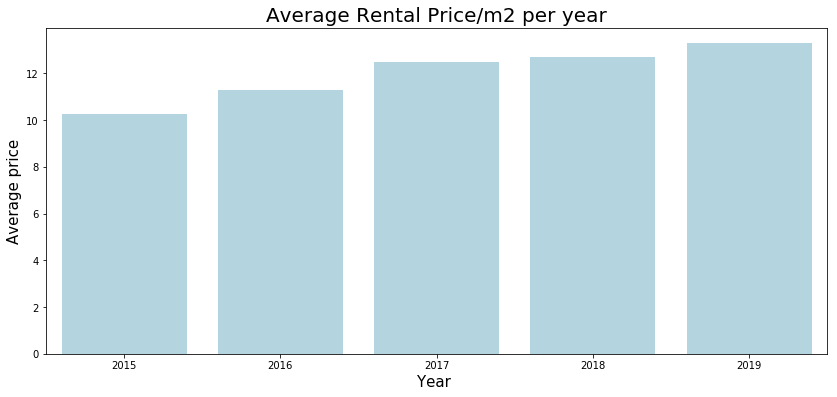

In [11]:
distributions= df.groupby(['year','variable'])['Nominal '].mean().reset_index()
#distributions=distributions.sort_values(by=['Preu'])
total = len(distributions)
plt.figure(figsize=(14,6))
distribution=distributions[distributions.variable=="Average renting price/m2"]
g = sns.barplot(x='year', y='Nominal ',color='lightblue',
                  data=distribution)
g.set_title("Average Rental Price/m2 per year", fontsize=20)
g.set_xlabel("Year ", fontsize=15)
g.set_ylabel("Average price", fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=0)


plt.show()

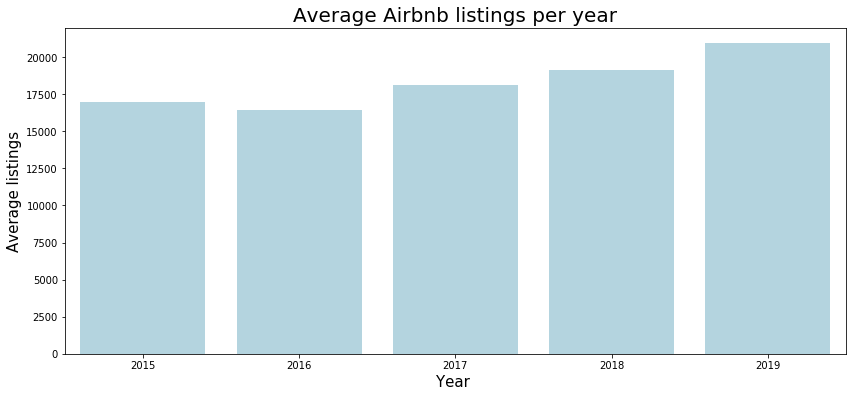

In [15]:
distributions= df.groupby(['year','variable'])['Nominal '].sum().reset_index()
#distributions=distributions.sort_values(by=['Preu'])
plt.figure(figsize=(14,6))
distribution=distributions[distributions.variable=="Average airbnb listings"]
g = sns.barplot(x='year', y='Nominal ',color='lightblue',
                  data=distribution)
g.set_title("Average Airbnb listings per year", fontsize=20)
g.set_xlabel("Year ", fontsize=15)
g.set_ylabel("Average listings", fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=0)


plt.show()

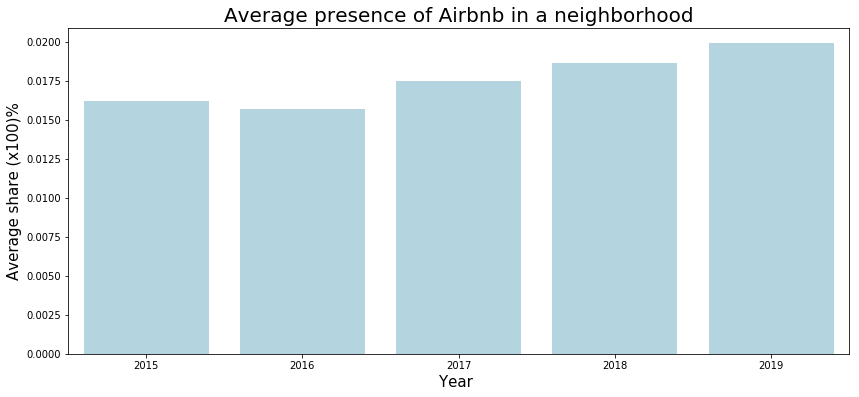

In [22]:
distributions= df.groupby(['year','variable'])['Nominal '].mean().reset_index()
#distributions=distributions.sort_values(by=['Preu'])
plt.figure(figsize=(14,6))
distribution=distributions[distributions.variable=="Average weight of airbnb inside the neighbourhood"]
g = sns.barplot(x='year', y='Nominal ',color='lightblue',
                  data=distribution)
g.set_title("Average presence of Airbnb in a neighborhood", fontsize=20)
g.set_xlabel("Year ", fontsize=15)
g.set_ylabel("Average share (x100)%", fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=0)


plt.show()

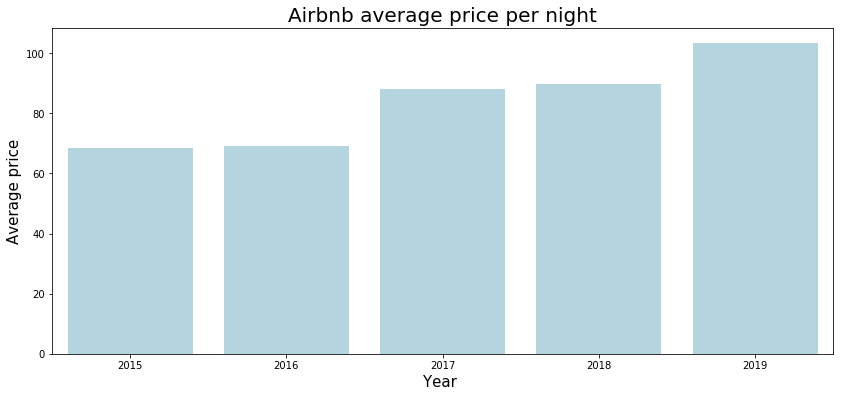

In [23]:
distributions= df.groupby(['year','variable'])['Nominal '].mean().reset_index()
#distributions=distributions.sort_values(by=['Preu'])
plt.figure(figsize=(14,6))
distribution=distributions[distributions.variable=="Airbnb average price per night"]
g = sns.barplot(x='year', y='Nominal ',color='lightblue',
                  data=distribution)
g.set_title("Airbnb average price per night", fontsize=20)
g.set_xlabel("Year ", fontsize=15)
g.set_ylabel("Average price", fontsize=15)
g.set_xticklabels(g.get_xticklabels(), rotation=0)


plt.show()

In [26]:
print("There are ", len(df.neighbourhood.unique()), "different neighborhoods in the city of Barcelona")

There are  73 different neighborhoods in the city of Barcelona


## 3. Data Analysis

   Our main point in this section, apart from providing an interactive app for the user to discover insights, was to find the correlation between the growth of Airbnb and the growth in rental price in the city of Barcelona.
   
   Therefore apart from descriptive plots, and the sorce code used to build the app that can be found here: https://github.com/datatouristbcn/datatouristbcn.github.io/blob/master/final_app_bcn.py
   
   We also performed a logistic regression in the studied period (2015-2019)
   
   The main finding is as follows:
   


In [28]:
total_houses=pd.read_csv('https://raw.githubusercontent.com/datatouristbcn/datatouristbcn.github.io/master/total_houses.csv')

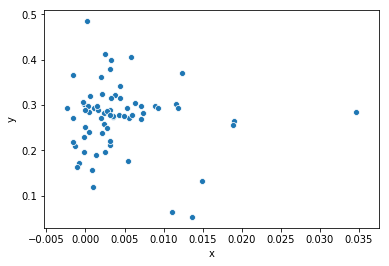

In [30]:

xy=pd.DataFrame()

xy['neighbourhood']=df['id_neighbourhood'].unique()
x=list(df[(df.year==2019)&(df.variable=='Average weight of airbnb inside the neighbourhood')]['Nominal '])-(df[(df.year==2015)&(df.variable=='Average weight of airbnb inside the neighbourhood')]['Nominal '])
y=(list(df[(df.year==2019)&(df.variable=='Average renting price/m2')]['Nominal '])-df[(df.year==2015)&(df.variable=='Average renting price/m2')]['Nominal '])/df[(df.year==2015)&(df.variable=='Average renting price/m2')]['Nominal ']
xy['x']=x.values
xy['y']=y.values
xy['total_houses']=total_houses['total_houses'].values
xy['name']=df['neighbourhood'].unique()

ax = sns.scatterplot(x="x", y="y",

                     #hue="size", #size="size",

                     data=xy)

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x=xy["x"].to_list()
x = np.asarray(x, dtype=np.float32).reshape((-1, 1))
y=xy["y"].to_list()
y = np.asarray(y, dtype=np.float32)
x=np.nan_to_num(x)
y=np.nan_to_num(y)
model.fit(x,y)
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
print('intercept:', new_model.intercept_)
intercept: [5.63333333]
print('slope:', new_model.coef_)
slope: [[0.54]]
slope=new_model.coef_[0]
intercept=new_model.intercept_

coefficient of determination: 0.03635034328256781
intercept: [0.24225911]
slope: [[3.0079303]]


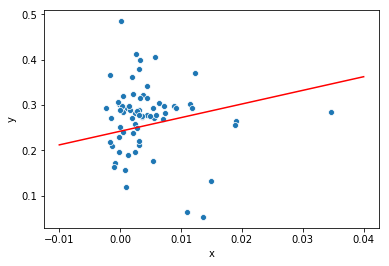

In [41]:

xy=pd.DataFrame()

xy['neighbourhood']=df['id_neighbourhood'].unique()
x=list(df[(df.year==2019)&(df.variable=='Average weight of airbnb inside the neighbourhood')]['Nominal '])-(df[(df.year==2015)&(df.variable=='Average weight of airbnb inside the neighbourhood')]['Nominal '])
y=(list(df[(df.year==2019)&(df.variable=='Average renting price/m2')]['Nominal '])-df[(df.year==2015)&(df.variable=='Average renting price/m2')]['Nominal '])/df[(df.year==2015)&(df.variable=='Average renting price/m2')]['Nominal ']
xy['x']=x.values
xy['y']=y.values
xy['total_houses']=total_houses['total_houses'].values
xy['name']=df['neighbourhood'].unique()
x_lim= np.arange(-0.01,0.05,0.01)
ax = sns.scatterplot(x="x", y="y",

                     #hue="size", #size="size",

                     data=xy)
ax.plot(x_lim, intercept + slope * x_lim, color='r')


The results show a small correlation between the increase in Airbnb share and the increase in Average rental price. But this could be also related to many other features such as the migrations of people in the city or the size of the specific neighborhood or the specific Airbn listing (if it is the full apartment or just one room). So these are inconclusive results for further analysis. 

## 4. Genre. Which genre of data story did you use?

### Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
**VISUAL STRUCTURING**: We have used consistent visual platform and Timebar mainly.

Because we had so many different data and we thought that the best way to show it was to allow the user play with it. And as it was data of a 5 years period, we consider it good to have a timebar to being able to filter the visualization by year.

**HIGHLIGHTING**: Close-Ups, Feature Distinction, Motion, Zooming.

Since our main intantion was to make the user participant of the analysis, having this tools would maximize its experience.

**TRANSITION GUIDANCE**: Familiar objects (map)

The master visualization is a map because only by names it is difficult to cataloge data, therefore providing a structure that everyone knows to better visualize those names was important.

### Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?
   
**ORDERING**: User directed Path

We wanted to derect the user through the article and through the visual

**INTERACTIVITY**: Hover Highlighting/Details, Filtering/Selection/Search, Navigation Buttons

Because the main point of the Housing section was to allow the interactivity for the user. The map and the features are related between them so allowing the user to interact with the visualization was important to better explore the data.


**MESSAGING**: Caption/Headlines, Annotations, Acompanying Article, Introductory text, summary

We used this kind of narrative strucure tools because we wanted to propose the story and the problem at the beginning, allow the user iteract and discover in the middle and propose some insights at the end of the article.

## 5. Visualizations.


### Explain the visualizations you've chosen.
### Why are they right for the story you want to tell?
    
In this section we have chosen 4 main types of visualizations:
**GEO VISUALIZATION**
        We have used the geo visualization to be the master of the other plots. Here is where you can phisically see the data in a map. From this visualization all the others visualizations are modified depending on the neighborhood.
        
**SCATTER**
    We have used a scatter plot to show the correlation between the main two studied variables. 
    
**LINEPLOTS**
    We have used a lineplot to show the evolution over time of the selected variable.
    
**(INDEXED LINEPLOTS)**
   We have used a lineplot indexed to show 
   
And the pruposed was to link all together and to make let the user iteract with the visualizations.

You can access the link of the visualizations here:

<a href="https://sodata2.herokuapp.com/">Find the visual app here

## 6. Discussion. Think critically about your creation

We think that this visualization fits most of its expectations from the designing phase. Nevertheless, it would have been useful to fit it better in the webpage,because it is a bit big for a computer, and it also would have been good to eliminate non important data that could affect it (e.g. some neighborhoods showed very few data and are not important in the analysis)

It would have also been useful to analyze periods in the map instead single years.
And as a future work, in the analytical part could have been included other features such as immigration and migration inside the city, filter better the dataset of Airbnb in order to find hidden correlations.

## 7. Contributions. Who did what?

All the Housing section and visualization was done by s192390

## 8. References

Datasets are obtained from:

Data about rental prices and total houses per neighborhood:<br>
https://opendata-ajuntament.barcelona.cat/<br>
https://www.bcn.cat/estadistica/catala/dades/barris/index.htm<br>

Data about airbnb:<br>
http://insideairbnb.com/get-the-data.html

Geodata about barcelona:<br>
https://github.com/martgnz/bcn-geodata